https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data

In [2]:
# import datasets
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.shape

(13320, 9)

In [6]:
# basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
# numerical features
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [8]:
# categorical features
df.describe(include='O')

,area_type,availability,location,size,society,total_sqft
count,13320,13320,13319,13304,7818,13320
unique,4,81,1305,31,2688,2117
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200
freq,8790,10581,540,5199,80,843


In [9]:
df.isnull().sum()/len(df)*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [10]:
# dropping 'society'
def drop(col_name):
    df.drop(columns=[col_name], inplace=True)

In [11]:
drop('society')

In [12]:
df['balcony'] = df['balcony'].fillna(df['balcony'].median())

In [13]:
df.dropna(inplace=True)

Super built-up  Area    8740
Built-up  Area          2410
Plot  Area              2009
Carpet  Area              87
Name: area_type, dtype: int64


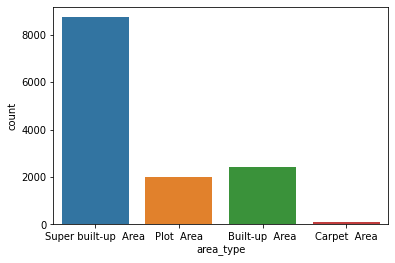

In [14]:
print(df['area_type'].value_counts())
sns.countplot(df['area_type'])
plt.show()

Observation:
    
    The super built-up Area is most common built up area in banglore 
    where as carpet area is least famous

<AxesSubplot:xlabel='availability', ylabel='count'>

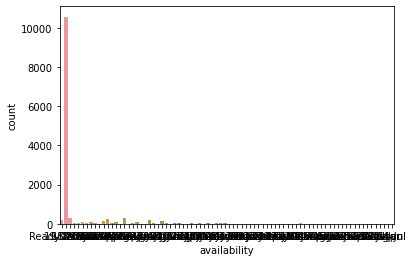

In [15]:
df['availability'].value_counts()
sns.countplot(df['availability'])

In [16]:
# drop availability
drop('availability')

In [17]:
df['location'] = df['location'].apply( lambda x:x.strip())
location_count = df['location'].value_counts()

In [18]:
location_count_less_10 = location_count[location_count<=10]
location_count_less_10

Naganathapura                     10
Sadashiva Nagar                   10
Nagappa Reddy Layout              10
BTM 1st Stage                     10
Sector 1 HSR Layout               10
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: location, Length: 1052, dtype: int64

In [72]:
df['location'].nunique()

242

In [19]:
df['location'] = df['location'].apply(lambda x: 'other' if x in location_count_less_10 else x)

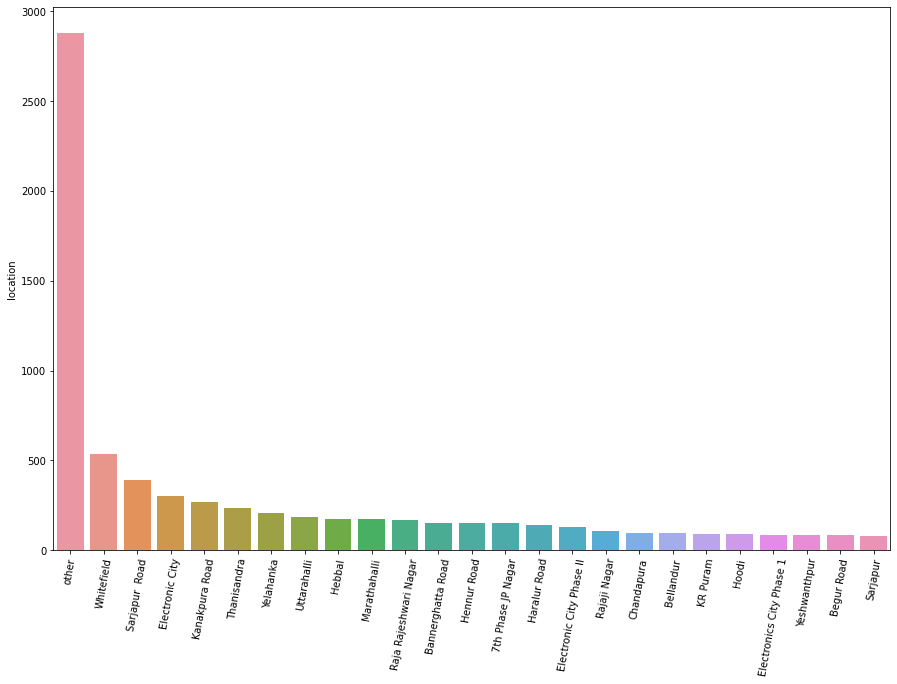

In [20]:
# top 25 location in banglore
plt.figure(figsize=(15,10))
a = df['location'].value_counts().head(25)
sns.barplot(x = a.index, y = a)
plt.xticks(rotation=80)
plt.show()

most of the locations are random and the count is almost 3000

Whitefield is second most famous location in banglore  with more than 500 counts 



In [21]:
df['size']

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13246, dtype: object

In [22]:
df['bhk'] = df['size'].str.split().str.get(0).astype(int)

<AxesSubplot:xlabel='bhk'>

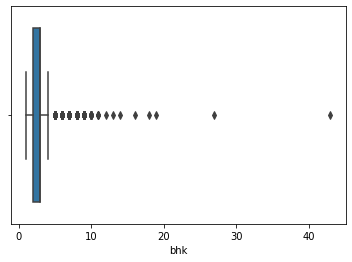

In [23]:
sns.boxplot(df['bhk'])

In [24]:
df['bhk'].value_counts()

2     5527
3     4832
4     1395
1      649
5      353
6      221
7      100
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: bhk, dtype: int64

In [25]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [26]:
def convertRange(x):
    
    temp = x.split('-')
    if len(temp) ==2:
        return (float(temp[0]) + float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [27]:
df['total_sqft'] = df['total_sqft'].apply(convertRange)

In [28]:
df.head(1)

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2


In [29]:
df['total_sqft'].isnull().sum()

46

In [30]:
df.dropna(inplace=True)

2.0     6893
3.0     3274
4.0     1222
1.0      781
5.0      521
6.0      269
7.0      102
8.0       64
9.0       41
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64


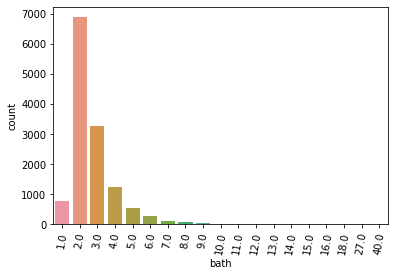

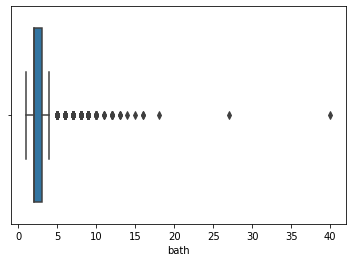

In [31]:
print(df['bath'].value_counts())
sns.countplot(df['bath'])
plt.xticks(rotation=80)
plt.show()
sns.boxplot(df['bath'])
plt.show()


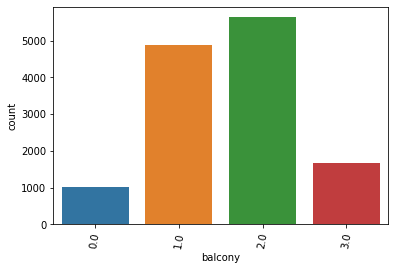

In [32]:
sns.countplot(df['balcony'])
plt.xticks(rotation=80)
plt.show()

there are almost 10000 rooms with either 1 or 2 balconys

<AxesSubplot:xlabel='price', ylabel='Density'>

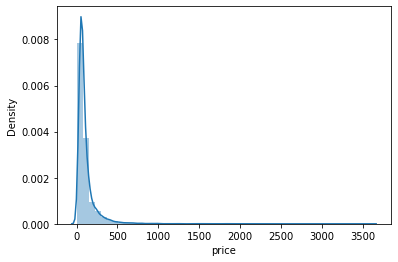

In [33]:
sns.distplot(df['price'])

highly right skewewd distribution

In [34]:
# price per sq feet
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']

In [35]:
df['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13200, dtype: float64

In [36]:
df.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,1.602348,112.276178,2.800833,7.920759e+03
std,1237.323445,1.338915,0.804268,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,0.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4.267701e+03
50%,1275.000000,2.000000,2.000000,71.850000,3.000000,5.438331e+03
75%,1672.000000,3.000000,2.000000,120.000000,3.000000,7.317073e+03
max,52272.000000,40.000000,3.000000,3600.000000,43.000000,1.200000e+07


In [37]:
(df['total_sqft']/df['bhk']).describe()

count    13200.000000
mean       573.847262
std        388.079980
min          0.250000
25%        473.000000
50%        552.000000
75%        625.000000
max      26136.000000
dtype: float64

here the minimum value is 0.25 sqft/bhk but normally minimum flat size is 300
so we will keep only those houses whose flat size is greater than 300

#### outlier detection and removal

In [38]:
df = df[((df['total_sqft']/df['bhk'] >= 300))]

In [39]:
df.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000
mean,1590.189927,2.562781,1.602280,111.187960,2.649004,6308.502826
std,1260.404795,1.080275,0.798015,152.203367,0.976046,4168.127339
min,300.000000,1.000000,0.000000,9.000000,1.000000,267.829813
25%,1115.000000,2.000000,1.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,2.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3.000000,3600.000000,16.000000,176470.588235


In [40]:
df.shape

(12456, 9)

In [41]:
# here we are going to remove outliers from price per sqft
def remove_outliers_sqft(df):
    df_output = pd.DataFrame()
    for key, subdf in df.groupby('location'): # group by returns key which will be ourlocation and its subDF
        
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        
        gen_df = subdf[(subdf.price_per_sqft >= (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_output = pd.concat([df_output, gen_df],ignore_index =True)
    return df_output
df = remove_outliers_sqft(df)
df.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000
mean,1503.877034,2.474075,1.605312,90.982730,2.572210,5657.702572
std,876.716232,0.981338,0.788137,86.147549,0.896219,2266.476980
min,300.000000,1.000000,0.000000,10.000000,1.000000,1250.000000
25%,1108.000000,2.000000,1.000000,49.000000,2.000000,4244.762955
50%,1282.000000,2.000000,2.000000,67.000000,2.000000,5172.413793
75%,1650.000000,3.000000,2.000000,100.000000,3.000000,6426.099852
max,30400.000000,16.000000,3.000000,2200.000000,16.000000,24509.803922


In [42]:
def bhk_outlier_remover(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
#         print(location, bhk_stats)
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')
        

In [43]:
df = bhk_outlier_remover(df)

In [44]:
df.shape

(7329, 9)

In [45]:
df.head(1)

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.54386


In [46]:
df.drop(columns=['size','price_per_sqft'],inplace=True)

In [47]:
df.groupby('area_type')['price'].mean()

area_type
Built-up  Area           99.002400
Carpet  Area             89.714286
Plot  Area              161.212683
Super built-up  Area     91.636410
Name: price, dtype: float64

#### Cleaned data

In [48]:
df.head()

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2


In [85]:
df.dtypes

area_type      object
location       object
total_sqft    float64
bath          float64
balcony       float64
price         float64
bhk           float64
dtype: object

In [86]:
df['bhk'] = df['bhk'].astype('float64')

<AxesSubplot:>

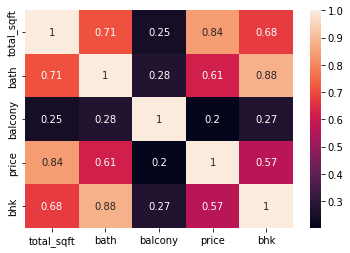

In [88]:
sns.heatmap(df.corr(), annot=True)

In [87]:
df.to_csv('cleaned_data.csv')

In [50]:
X = df.drop(columns=['price'])
y = df['price']

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.compose import make_column_transformer

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, test_size =0.2)

In [53]:
print(X_train.shape)
print(y_train.shape)

(5863, 6)
(5863,)


#### applying linear regression

In [54]:
column_trans = make_column_transformer((OneHotEncoder(sparse=False), ['location','area_type']),
                                      remainder = 'passthrough')

In [55]:
scaler = StandardScaler()

In [56]:
lr = LinearRegression(normalize=True)

In [57]:
pipe = make_pipeline(column_trans, scaler,lr)

In [58]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location', 'area_type'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression(normalize=True))])

In [59]:
y_pred_lr = pipe.predict(X_test)

In [60]:
r2_score(y_test, y_pred_lr)

0.857643970704097

#### applying lasso

In [61]:
lasso = Lasso()

In [62]:
pipe = make_pipeline(column_trans, scaler, lasso)

In [63]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location', 'area_type'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [64]:
y_pred_lasso = pipe.predict(X_test)
r2_score(y_test, y_pred_lasso)

0.8452877303530416

#### applying ridge

In [65]:
ridge = Ridge()

In [66]:
pipe = make_pipeline(column_trans, scaler, ridge)


In [67]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location', 'area_type'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [68]:
y_pred_ridge = pipe.predict(X_test)
r2_score(y_test, y_pred_ridge)

0.8574841356555759

In [69]:
print('No regularization: ', r2_score(y_test, y_pred_lr))
print('Lasso: ', r2_score(y_test, y_pred_lasso))
print('Ridge: ', r2_score(y_test, y_pred_ridge))

No regularization:  0.857643970704097
Lasso:  0.8452877303530416
Ridge:  0.8574841356555759


In [70]:
import pickle
pickle.dump(pipe, open('RidgeModel.pkl','wb'))

In [74]:
locations = sorted(df['location'].unique())

In [77]:
area_type = sorted(df['area_type'].unique())

In [78]:
area_type

['Built-up  Area', 'Carpet  Area', 'Plot  Area', 'Super built-up  Area']

In [79]:
df.dtypes

area_type      object
location       object
total_sqft    float64
bath          float64
balcony       float64
price         float64
bhk             int32
dtype: object